In [16]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np

In [17]:
%env ROS_MASTER_URI=http://localhost:11311
%env ROS_IP=127.0.0.1

env: ROS_MASTER_URI=http://localhost:11311
env: ROS_IP=127.0.0.1


In [18]:
arm_control = LocobotArmControl()


[INFO] [1745937584.680620, 36.465000]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745937584.682254, 36.467000]: Joint‐space action server ready
[INFO] [1745937584.987849813, 36.775000000]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745937585.182744, 36.970000]: LocobotArmControl initialized


In [19]:
import numpy as np
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler

# Create target poses
target_pose = Pose()
target_pose.position.x = 0.3
target_pose.position.y = -0.3
target_pose.position.z = 0.3

# Create a quaternion for (roll=0, pitch=-90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]

# Execute the grab sequence
# arm_control.move_gripper(0.1)  # Open gripper
arm_control.go_to_pose(target_pose)  # Move to approach position


True

In [24]:
import rospy
from interbotix_xs_msgs.msg import JointSingleCommand
gripper_pub = rospy.Publisher(
            "/locobot/commands/joint_single",
            JointSingleCommand,
            queue_size=1
        )

cmd = JointSingleCommand(name="gripper", cmd=0.0)
gripper_pub.publish(cmd)


In [25]:
import rospy
from interbotix_xs_msgs.msg import JointSingleCommand
gripper_pub = rospy.Publisher(
            "/locobot/gripper_controller/command",
            JointSingleCommand,
            queue_size=1
        )

cmd = JointSingleCommand(name="gripper", cmd=0.0)
gripper_pub.publish(cmd)

In [34]:
width = 2.0
duration = 2.0

width = max(0.0, min(0.1, width))
pos = width / 2.0
traj = JointTrajectory()
traj.joint_names = ['left_finger', 'right_finger']

pt = JointTrajectoryPoint()
pt.positions = [pos, -pos]
pt.time_from_start = rospy.Duration(duration)
traj.points = [pt]
traj.header.stamp = rospy.Time.now()

gripper_pub = rospy.Publisher(
            "/locobot/gripper_controller/command",
            JointTrajectory,
            queue_size=1
        )


gripper_pub.publish(traj)
rospy.sleep(duration + 0.2)

In [22]:
import rospy
from interbotix_xs_msgs.msg import JointSingleCommand
from trajectory_msgs.msg import JointTrajectory, JointTrajectoryPoint

width = 0.0
traj = JointTrajectory()
traj.joint_names = ['left_finger']
pt = JointTrajectoryPoint()
pt.positions = [width]
traj.points = [pt]


gripper_pub = rospy.Publisher(
            "/locobot/gripper_controller/command",
            JointTrajectory,
            queue_size=1
        )

gripper_pub.publish(traj)


In [5]:
arm_control.open_gripper()

TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

In [5]:
cam = LocobotCamera()
img = cam.get_image()

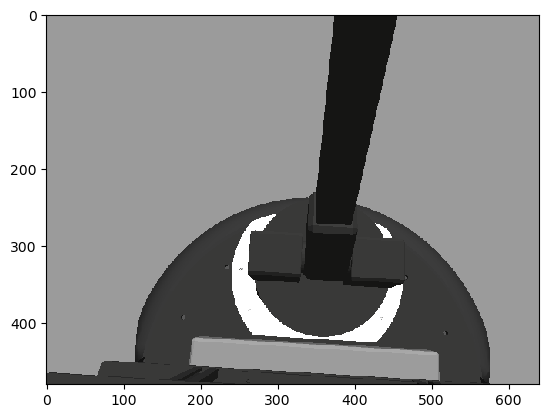

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()